<a href="https://colab.research.google.com/github/butchland/fastai_xla_extensions/blob/master/samples/TabularTrainingTPUdemo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!curl -s https://course19.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [ ]:
!pip install fastcore==0.1.18
!pip install fastai2==0.0.17
!pip install git+https://github.com/butchland/fastai_xla_extensions.git@595e8b175a7d89197e955ecc7ce3c126ceb1fc02

ERROR: fastai 2.0.0 has requirement fastcore>=1.0.0, but you'll have fastcore 0.1.18 which is incompatible.
  Found existing installation: fastcore 1.0.0
    Uninstalling fastcore-1.0.0:
      Successfully uninstalled fastcore-1.0.0
     |████████████████████████████████| 194kB 3.4MB/s 
  Cloning https://github.com/butchland/fastai_xla_extensions.git (to revision 595e8b175a7d89197e955ecc7ce3c126ceb1fc02) to /tmp/pip-req-build-byrqx6qt
  Running command git clone -q https://github.com/butchland/fastai_xla_extensions.git /tmp/pip-req-build-byrqx6qt
  Running command git checkout -q 595e8b175a7d89197e955ecc7ce3c126ceb1fc02
  Created wheel for fastai-xla-extensions: filename=fastai_xla_extensions-0.0.1-cp36-none-any.whl size=11232 sha256=408ccfd927b7ad3cdcef9e55610b6a3288adaebc84d7ceac9efe97114798512c
  Stored in directory: /tmp/pip-ephem-wheel-cache-0erwnn5n/wheels/c0/07/ae/7446ca5cf3b8a407e63f8d1d9f3ebeaf5c613cd32de55a70f2
Successfully built fastai-xla-extensions


In [ ]:
VERSION = "20200325" #@param ["1.5" , "20200707", "20200325", "nightly"]
!curl https://raw.githubusercontent.com/pytorch/xla/master/contrib/scripts/env-setup.py -o pytorch-xla-env-setup.py > /dev/null
!python pytorch-xla-env-setup.py --version $VERSION > /dev/null

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5115  100  5115    0     0  63937      0 --:--:-- --:--:-- --:--:-- 63937
Copying gs://tpu-pytorch/wheels/torch-nightly+20200325-cp36-cp36m-linux_x86_64.whl...
- [1 files][ 83.4 MiB/ 83.4 MiB]                                                
Operation completed over 1 objects/83.4 MiB.                                     
Copying gs://tpu-pytorch/wheels/torch_xla-nightly+20200325-cp36-cp36m-linux_x86_64.whl...
- [1 files][114.5 MiB/114.5 MiB]                                                
Operation completed over 1 objects/114.5 MiB.                                    
Copying gs://tpu-pytorch/wheels/torchvision-nightly+20200325-cp36-cp36m-linux_x86_64.whl...
/ [1 files][  2.5 MiB/  2.5 MiB]                                                
Operation completed over 1 objects/2.5 MiB.                                      
ERROR:

In [ ]:
!pip freeze | grep torch
!pip freeze | grep fastai2
!pip freeze | grep fastcore
!pip freeze | grep fastai-xla-extensions

torch==1.5.0a0+d6149a7
torch-xla==1.6+e788e5b
torchsummary==1.5.1
torchtext==0.3.1
torchvision==0.6.0a0+3c254fb
fastai2==0.0.17
fastcore==0.1.18
fastai-xla-extensions==0.0.1


In [ ]:

import fastai_xla_extensions.core

In [ ]:
from fastai2.tabular.all import *

In [ ]:
dede = default_device();dede

device(type='xla', index=1)

In [ ]:
path = untar_data(URLs.ADULT_SAMPLE)
df = pd.read_csv(path/'adult.csv')

In [ ]:
dls = TabularDataLoaders.from_csv(path/'adult.csv', path=path, y_names="salary",
    cat_names = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race'],
    cont_names = ['age', 'fnlwgt', 'education-num'],
    procs = [Categorify, FillMissing, Normalize])
dls.device

device(type='xla', index=1)

In [ ]:
learn = tabular_learner(dls, metrics=accuracy)
learn.fit_one_cycle(15)

epoch,train_loss,valid_loss,accuracy,time
0,0.359043,0.368138,0.831388,00:21
1,0.365622,0.365196,0.832617,00:17
2,0.355164,0.360189,0.834613,00:17
3,0.360037,0.366393,0.830620,00:17
4,0.360067,0.361021,0.837838,00:18
5,0.347172,0.357687,0.834920,00:18
6,0.334674,0.362081,0.838759,00:17
7,0.345362,0.358018,0.837531,00:17
8,0.340854,0.360640,0.837838,00:17
9,0.325679,0.363397,0.835842,00:18


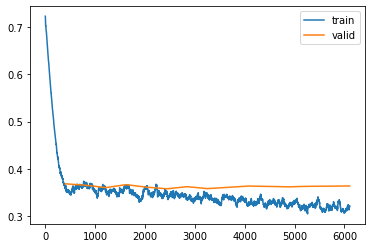

In [ ]:
learn.recorder.plot_loss()

In [ ]:
learn.predict(df.iloc[0])

(   workclass  education  marital-status  ...    fnlwgt  education-num  salary
 0        5.0        8.0             3.0  ... -0.839583       0.751026     0.0
 
 [1 rows x 11 columns], tensor(0), tensor([0.5769, 0.4231]))

In [ ]:
test_df = df.copy()
test_df.drop(['salary'], axis=1, inplace=True)
dl = learn.dls.test_dl(test_df)
learn.get_preds(dl=dl)

(tensor([[0.5771, 0.4229],
         [0.1922, 0.8078],
         [0.9980, 0.0020],
         ...,
         [0.6326, 0.3674],
         [0.6901, 0.3099],
         [0.6678, 0.3322]]), None)